🌍 **French to Arabic Translation**

In this notebook, we will build a simple French-to-Arabic translation system using a pre-trained model from the HuggingFace Transformers library.

Instead of training a model from scratch, we will reuse a powerful existing model:
Helsinki-NLP/opus-mt-fr-ar, part of the OPUS-MT project.

This approach saves time, requires no labeled data, and achieves high-quality translations with just a few lines of code.


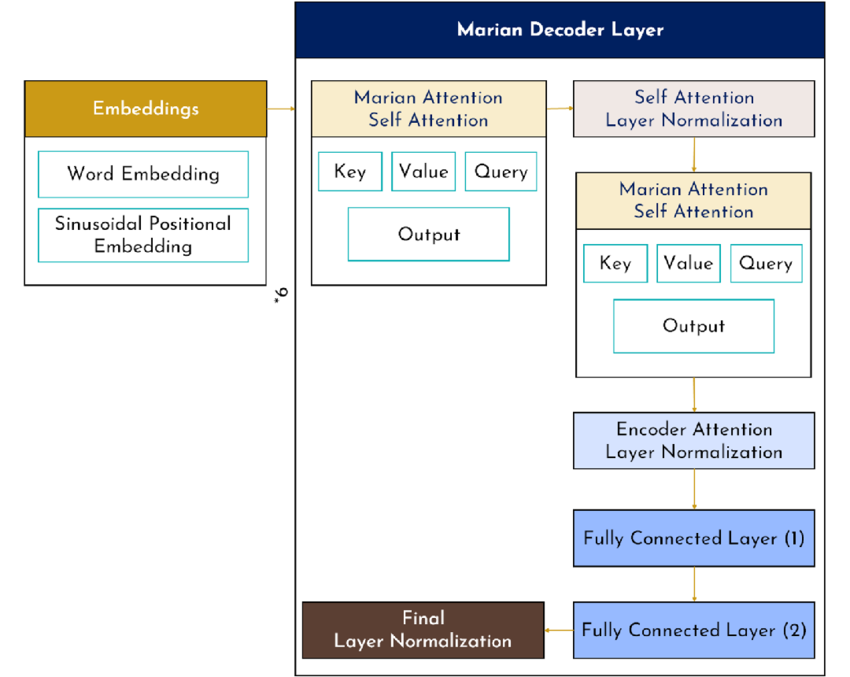

In [17]:
# We install 'transformers' to load pre-trained translation models
!pip install transformers sentencepiece

In [21]:
!pip install torch

   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/212.5 MB 3.3 MB/s eta 0:01:05
   ---------------------------------------- 0.3/212.5 MB 3.7 MB/s eta 0:00:58
   ---------------------------------------- 0.5/212.5 MB 4.3 MB/s eta 0:00:50
   ---------------------------------------- 0.7/212.5 MB 4.0 MB/s eta 0:00:53
   ---------------------------------------- 0.7/212.5 MB 3.3 MB/s eta 0:01:05
   ---------------------------------------- 0.7/212.5 MB 3.3 MB/s eta 0:01:05
   ---------------------------------------- 0.8/212.5 MB 2.6 MB/s eta 0:01:23
   ---------------------------------------- 0.8/212.5 MB 2.2 MB/s eta 0:01:36
   ---------------------------------------- 0.8/212.5 MB 2.2 MB/s eta 0:01:36
   ---------------------------------------- 0.9/212.5 MB 1.9 MB/s eta 0:01:49
   ---------------------------------------- 0.9/212.5 MB 1.9 MB/s eta 0:01:49
   ---------------------------------------- 0.9/212.5 MB 1.9 MB/s eta 0

In [23]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Seq2SeqTrainer, Seq2SeqTrainingArguments

In [25]:
from transformers import MarianMTModel, MarianTokenizer

In [28]:
# Charger le tokenizer et le modèle pour FR -> AR
model_name = 'Helsinki-NLP/opus-mt-fr-ar'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

model.safetensors:   0%|          | 0.00/307M [00:00<?, ?B/s]

In [ ]:
# Fonction de traduction
def translate(texts):
    inputs = tokenizer(texts, return_tensors="pt", padding=True)
    translated = model.generate(**inputs)
    translated_texts = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]
    return translated_texts

Final Output Example

In [ ]:
# Tes phrases à traduire
sentences = ["certificat médicale"]

# Traduire phrase par phrase
for sentence in sentences:
    translated = translate(sentence)
    print(f"{sentence} -> {translated}")

In [ ]:
model.save_pretrained("./marianmt-fr-ar")
tokenizer.save_pretrained("./marianmt-fr-ar")

In [ ]:
import shutil

shutil.make_archive("/content/marianmt-fr-ar", 'zip', "./marianmt-fr-ar")

In [ ]:
from google.colab import files

files.download("/content/marianmt-fr-ar.zip")


In [ ]:
pip install flask transformers sentencepiece


In [ ]:
from flask import Flask, request, jsonify
from transformers import MarianMTModel, MarianTokenizer
import torch

app = Flask(__name__)

# Chargement du modèle et du tokenizer
model = MarianMTModel.from_pretrained("./marianmt-fr-ar")
tokenizer = MarianTokenizer.from_pretrained("./marianmt-fr-ar")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

@app.route('/translate', methods=['POST'])
def translate():
    data = request.get_json()
    text = data.get('text', '')
    if not text:
        return jsonify({'error': 'Texte non fourni'}), 400

    inputs = tokenizer([text], return_tensors="pt", padding=True).to(device)
    translated = model.generate(**inputs)
    translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)
    return jsonify({'translation': translated_text})

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
python app.py


In [ ]:
pip install streamlit transformers sentencepiece


In [ ]:
import streamlit as st
from transformers import MarianMTModel, MarianTokenizer
import torch

st.title("🈂️ Traduction Français → Arabe")

@st.cache_resource
def load_model():
    tokenizer = MarianTokenizer.from_pretrained("./marianmt-fr-ar")
    model = MarianMTModel.from_pretrained("./marianmt-fr-ar")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    return tokenizer, model, device

tokenizer, model, device = load_model()

text = st.text_area("Entrez le texte en français :", "certificat médicale")

if st.button("Traduire"):
    inputs = tokenizer([text], return_tensors="pt", padding=True).to(device)
    translated = model.generate(**inputs)
    translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)
    st.success("Traduction :")
    st.write(translated_text) 
    


In [ ]:
streamlit run app_streamlit.py
